# Statistical Analysis 

Each section contains a brief summary of the significant results after the Tukey analyses. 

#### Table of Contents

- Load Data
- MANOVA and Tukey for Section 2
- MANOVA and Tukey for Section 3
- MANOVA and Tukey for Section 4
- Visualizations

In [1]:
import pandas as pd 
import math
import seaborn as sns
import matplotlib.pyplot as plt

This line imports utils:

In [2]:
%run ../../utils/utils.py

## 1. Load Data

In [3]:
df = pd.read_csv('../../data/featured_data.csv')
df.head()

,s1_edad,s1_genero,s1_experiencia_clinica,s1_educacion,s1_titulo_terciario,s1_titulo,s1_no_titulo_universitario,s1_horas_semana_pacientes_atendidos,s1_contexto_trabajo,s1_orientacion_teo,...,s4_no_tiempo_aprender_tbe,s4_capacitacion_tbe_demasiado_dinero,s4_no_saber_tbe,s4_entrenamiento_clinico_no_info_tbe,s4_alianza_terapeutica_mas_importante,s4_terapias_igualmente_efectivas,s4_empleador_no_fondos_capacitacion_tbe,s4_exp_clinica_mas_importante_que_evidencia_cientifica,provincia_residencia,consentimiento_informado
0,41.0,Femenino,1.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,12.0,Ámbito Privado,Ecléctico (más de una de estas opciones),...,4.0,4.0,7.0,0.0,6.0,4.0,6.0,2.0,Provincia de Buenos Aires,NaN
1,26.0,Femenino,0.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,13.0,"Ámbito Privado, Obra Social o Prepaga",Terapias Cognitivas/Comportamentales,...,1.0,6.0,1.0,0.0,4.0,2.0,7.0,3.0,Provincia de Buenos Aires,NaN
2,27.0,Femenino,1.0,Carrera de Especialización,NaN,Lic. en Psicología,NaN,30.0,"Ámbito Privado, Obra Social o Prepaga",Terapias Cognitivas/Comportamentales,...,1.0,4.0,1.0,1.0,1.0,1.0,0.0,4.0,Ciudad Autónoma de Buenos Aires (CABA),NaN
3,30.0,Masculino,1.3,Carrera de Especialización,NaN,Lic. en Psicología,NaN,35.0,Ámbito Privado,Terapias Cognitivas/Comportamentales,...,2.0,3.0,0.0,4.0,3.0,0.0,7.0,3.0,Provincia de Buenos Aires,NaN
4,26.0,Masculino,2.0,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,46.0,Ámbito Público (hospital u otro),Terapias Cognitivas/Comportamentales,...,4.0,6.0,1.0,4.0,4.0,1.0,7.0,4.0,Provincia de Buenos Aires,NaN


In [4]:
df.columns

Index(['s1_edad', 's1_genero', 's1_experiencia_clinica', 's1_educacion',
       's1_titulo_terciario', 's1_titulo', 's1_no_titulo_universitario',
       's1_horas_semana_pacientes_atendidos', 's1_contexto_trabajo',
       's1_orientacion_teo', 's1_marco_teo_terapia_basada_arte',
       's1_marco_teo_psa', 's1_marco_teo_tcc', 's1_marco_teo_humanista',
       's1_marco_teo_eclectico', 's2_evidencia_cientifica',
       's2_experiencia_personal', 's2_entrenamiento_clinica',
       's2_tratamiento_preferencia_consultantes', 's2_intuicion',
       's2_terapia_personal', 's3_tratamiento_personal_consultantes',
       's3_investigacion_empirica_ensayos_controlados', 's3_supervision',
       's3_estudios_de_caso', 's3_discusion_pares', 's3_libros',
       's3_observaciones_casos_clinicos', 's3_medidas_resultado',
       's3_guias_manuales_clinicos',
       's4_apertura_terapias_desarrolladas_por_investigadores',
       's4_actualizacion_info_cientifica',
       's4_formacion_enfasis_investigaci

In [5]:
df['s1_orientacion_teo'].value_counts()

s1_orientacion_teo
Terapias Cognitivas/Comportamentales                       135
Psicoanálisis                                               80
Ecléctico (más de una de estas opciones)                    32
Sistémica                                                   14
Psicodinámica                                                4
Enfoque modular transformacional                             2
Humanista                                                    2
Emdr                                                         1
Emdr/ cognitiva                                              1
Psicocorporal                                                1
Tcc+ contextuales                                            1
Analista bioenergetica                                       1
Pscicocorporal                                               1
Neuropsicología.                                             1
Metacognitiva y sistémica                                    1
Conductuales contextuales (ACT)     

In [6]:
df['s1_marco_teo_psa'].value_counts()

s1_marco_teo_psa
Lacaniano                                                                                 19
Lacaniano, Freudiano                                                                      19
Freudiano                                                                                 16
Psicodinámica                                                                              4
Lacaniano, Freudiano, Posfreudiano                                                         3
Posfreudiano                                                                               3
Freudiano, Posfreudiano                                                                    2
Lacaniano, Freudiano, Psicología Analítica (junguiana)                                     1
Psicología Analítica (junguiana)                                                           1
Que pavada esto. Freudiana, lacaniana y deleuziana                                         1
Lacaniano, Freudiano, Posfreudiano, Kleiniano        

In [7]:
df['s1_marco_teo_tcc'].value_counts()

s1_marco_teo_tcc
Terapia Cognitiva                                                                                                                                                                                                                22
Terapia Cognitiva, Terapia de Conducta                                                                                                                                                                                           10
Terapia Cognitiva, Terapia de Conducta, Terapia de Aceptación y Compromiso                                                                                                                                                        9
Análisis Conductual Aplicado, Terapia Cognitiva, Terapia de Conducta                                                                                                                                                              9
Terapia Cognitiva, Terapia de Conducta, Terapia de Aceptación y Comprom

In [8]:
df['s1_marco_teo_eclectico'].value_counts()

s1_marco_teo_eclectico
Terapias Cognitivas/Comportamentales, Psicoanálisis                                                                                                     5
Terapias Cognitivas/Comportamentales, Sistémica                                                                                                         4
Psicoanálisis                                                                                                                                           3
Terapias Cognitivas/Comportamentales                                                                                                                    2
Humanista, Terapias Cognitivas/Comportamentales                                                                                                         2
Terapias Cognitivas/Comportamentales, Psicoanálisis, Sistémica                                                                                          2
Psicodinámica, Psicoanálisis                         

In [9]:
df['s1_genero'].value_counts()

s1_genero
Femenino               224
Masculino               56
Género no Binario        2
Prefiero no decirlo      1
Name: count, dtype: int64

In [10]:
df['s1_edad'].mean().round(2)

np.float64(35.14)

In [11]:
df['s1_horas_semana_pacientes_atendidos'].mean().round(2)

np.float64(24.88)

In [12]:
df['s1_experiencia_clinica'].mean().round(2)

np.float64(6.98)

In [13]:
df['s1_educacion'].value_counts()

s1_educacion
Licenciatura de Grado                                        149
Carrera de Especialización                                    87
Máster                                                        18
Doctorado                                                      6
Posdoctorado                                                   4
Posgrado                                                       3
Psicólogo + Cursos y formacion continua por cuenta propia      1
Residencia completa                                            1
Grado y Posgrados                                              1
Profesorado                                                    1
Varios posgrados con orientación psicoanalitica                1
Diplomatura y curso de posgrado                                1
Beca de Perfeccionamiento                                      1
Programa de actualización de posgrado en curso                 1
Licenciatura y Profesorado también                             1
Diplomado   

## 2. Statistical Analysis

Here, we analyze section 2,3 and 4. 

For each section we did a MANOVA analyses, as we had several independent variables. 

- Dependent variables: Theoretical orientation. 
- Independent variables: Information sources

### Section 2

### 2.1 Plot

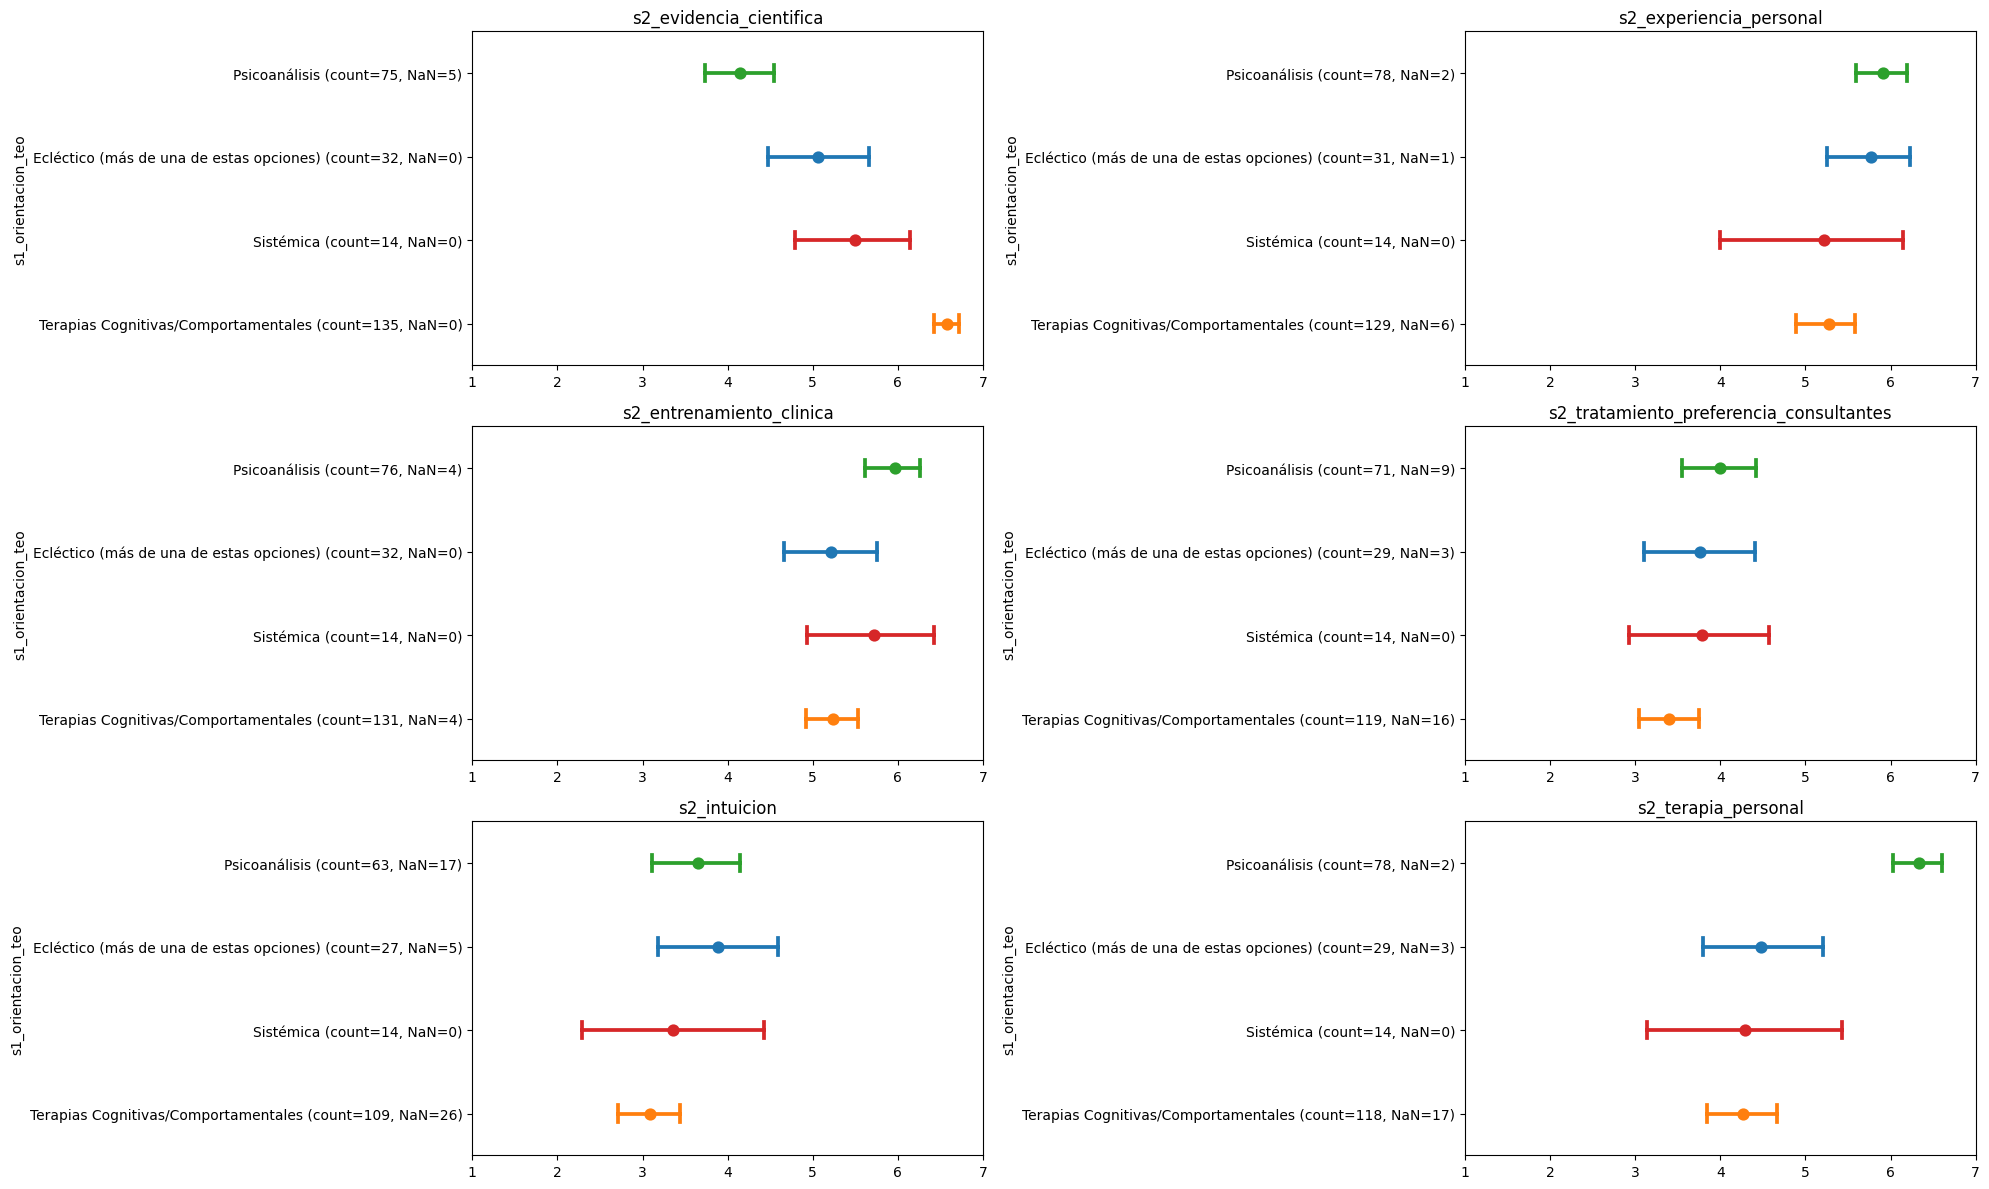

In [14]:
df_subset_s2 = create_section_2(df)
variables_s2 = ['s2_evidencia_cientifica', 's2_experiencia_personal', 's2_entrenamiento_clinica',
             's2_tratamiento_preferencia_consultantes', 's2_intuicion', 's2_terapia_personal']

plot_section(df_subset_s2, variables_s2)

### 2.2 MANOVA for section II

In [15]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Drop NaNs from the data
df_subset_clean = df_subset_s2.dropna()

# List of variables for which you want to perform one-way MANOVA
dependent_vars = variables_s2

# Define dependent and independent variables
X = df_subset_clean['s1_orientacion_teo']
Y = df_subset_clean[dependent_vars]

# Perform one-way MANOVA
maov = MANOVA.from_formula('s1_orientacion_teo ~ ' + ' + '.join(dependent_vars), data=df_subset_clean)

print(maov.mv_test())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept               Value         Num DF  Den DF         F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 4.0000 175.0000 -1106924065716106.6250 1.0000
         Pillai's trace               1.0000 4.0000 175.0000 -1106924065716106.6250 1.0000
 Hotelling-Lawley trace -25301121502082.4375 4.0000 175.0000 -1106924065716106.7500 1.0000
    Roy's greatest root -25301121502082.4375 4.0000 175.0000 -1106924065716106.6250 1.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

#### Interpretation

Significant predictors:

- Scientific evidence: Strongly significant (p < 0.0001).
- Personal therapy: Significantly contributes to explaining variance (p < 0.0001).

Non-significant predictors:

- Personal experience: No significant effect (p = 0.6450).
- Clinical training: Trend towards significance, but not significant (p = 0.1230).
- Client treatment preferences: No significant effect (p = 0.9137).
- Intuition: No significant effect (p = 0.7562).

### 2.3 Tukey's HSD 

In [16]:
import statsmodels.stats.multicomp as multi

# Loop over each variable in the list and perform Tukey's HSD
for var in variables_s2:
    mc = multi.MultiComparison(df_subset_clean[var], df_subset_clean['s1_orientacion_teo'])
    res = mc.tukeyhsd()
    print(f'{var}')
    print(res.summary())
    print()

s2_evidencia_cientifica
                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
                 group1                                 group2                meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------------------------------
Ecléctico (más de una de estas opciones)                        Psicoanálisis  -0.5371 0.4386 -1.4646 0.3903  False
Ecléctico (más de una de estas opciones)                            Sistémica   0.7083 0.4758 -0.5666 1.9833  False
Ecléctico (más de una de estas opciones) Terapias Cognitivas/Comportamentales   1.7083    0.0  0.8394 2.5773   True
                           Psicoanálisis                            Sistémica   1.2455 0.0253  0.1106 2.3803   True
                           Psicoanálisis Terapias Cognitivas/Comportamentales   2.2455    0.0  1.5993 2.8916   True
                               Sistémica Terapia

### 2.4 Significant Results for Section 2 Summary:

##### s2_evidencia_cientifica:

- Ecléctico vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 1.7083 (p = 0.0000).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of 1.2455 (p = 0.0253).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.2455 (p = 0.0000).

Interpretation: Cognitive-behavioral therapies (TCC) show greater evidence-based approaches compared to eclectic and psychoanalytic orientations.

##### s2_terapia_personal:

- Ecléctico vs Psicoanálisis: Significant difference with a mean difference of 1.8326 (p = 0.0019).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of -2.0052 (p = 0.0069).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -2.0735 (p = 0.0000).

Interpretation: Psychoanalytic practitioners report significantly less personal therapy experience compared to eclectic, systemic, and cognitive-behavioral practitioners.

### 2.5 MANCOVA for section II

In [17]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Drop NaNs from the data
df_subset_clean = df_subset_s2.dropna()

# List of variables for which you want to perform one-way MANCOVA
dependent_vars = variables_s2

# Define the formula including the independent variable and the covariates
formula = 's1_orientacion_teo ~ ' + ' + '.join(dependent_vars) + ' + s1_edad + s1_genero + s1_horas_semana_pacientes_atendidos'

# Perform one-way MANCOVA
mancova = MANOVA.from_formula(formula, data=df_subset_clean)

print(mancova.mv_test())

                               Multivariate linear model
                                                                                       
---------------------------------------------------------------------------------------
       Intercept               Value        Num DF  Den DF        F Value        Pr > F
---------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 4.0000 170.0000 509050489795824.7500 0.0000
         Pillai's trace              1.0000 4.0000 170.0000 509050489795824.7500 0.0000
 Hotelling-Lawley trace 11977658583431.1699 4.0000 170.0000 509050489795824.7500 0.0000
    Roy's greatest root 11977658583431.1699 4.0000 170.0000 509050489795824.7500 0.0000
---------------------------------------------------------------------------------------
                                                                                       
---------------------------------------------------------------

The adjustments indicate that when controlling for age, gender, and weekly hours of patient interaction, the group effect of `s1_orientacion_teo` on `s2_evidencia_cientifica` and `s2_terapia_personal` remains significant.
However, the F values and p-values slightly adjusted across the board, reflecting the covariates' influence.

### Section 3

#### 3.1 Plot for Section III

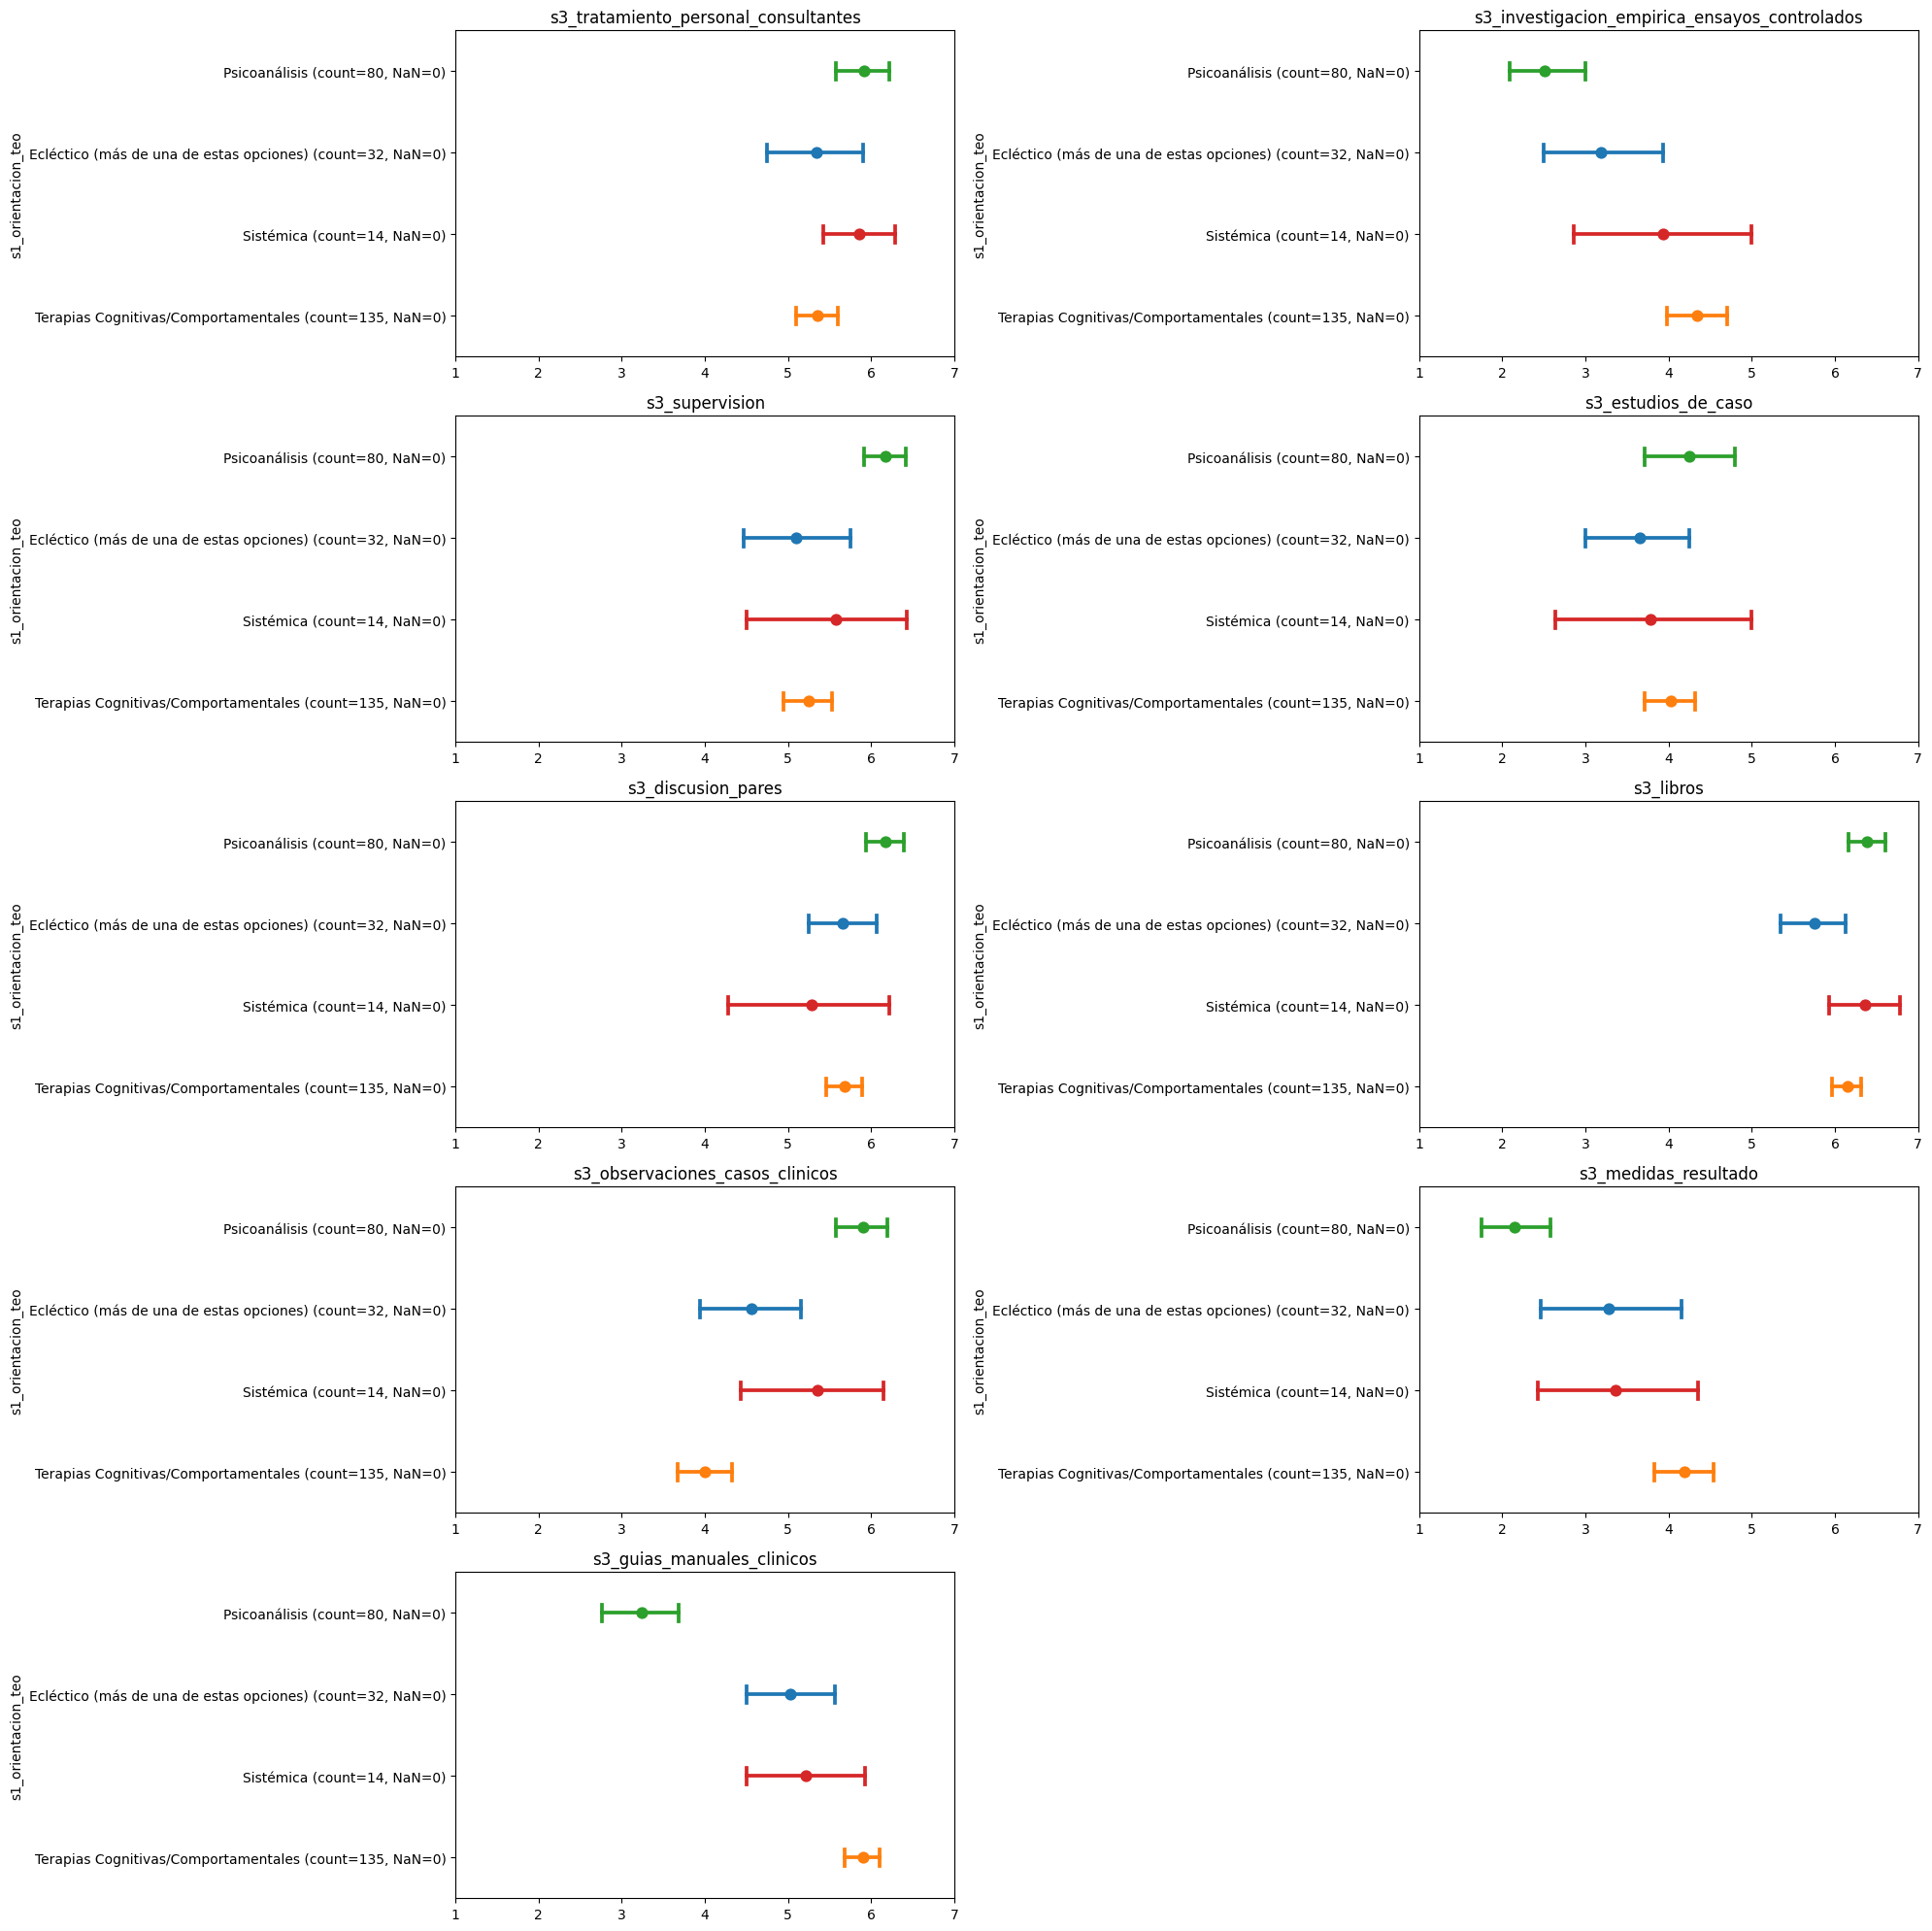

In [18]:
df_subset_s3 = create_section_3(df) 
variables_s3 = ['s3_tratamiento_personal_consultantes', 's3_investigacion_empirica_ensayos_controlados',
             's3_supervision', 's3_estudios_de_caso', 's3_discusion_pares', 's3_libros', 
             's3_observaciones_casos_clinicos', 's3_medidas_resultado', 's3_guias_manuales_clinicos']

plot_section(df_subset_s3, variables_s3)

#### 3.2.1 MANOVA for Section III

In [19]:
# Drop NaNs from the data
df_subset_clean = df_subset_s3.dropna()

# List of variables for which you want to perform one-way MANOVA
dependent_vars = variables_s3

# Define dependent and independent variables
X = df_subset_clean['s1_orientacion_teo']
Y = df_subset_clean[dependent_vars]

# Perform one-way MANOVA
maov = MANOVA.from_formula('s1_orientacion_teo ~ ' + ' + '.join(dependent_vars), data=df_subset_clean)

print(maov.mv_test())

                               Multivariate linear model
                                                                                        
----------------------------------------------------------------------------------------
       Intercept               Value        Num DF  Den DF         F Value        Pr > F
----------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 4.0000 248.0000 3878099679124531.5000 0.0000
         Pillai's trace              1.0000 4.0000 248.0000 3878099679124531.5000 0.0000
 Hotelling-Lawley trace 62549994824589.2188 4.0000 248.0000 3878099679124531.5000 0.0000
    Roy's greatest root 62549994824589.2188 4.0000 248.0000 3878099679124531.5000 0.0000
----------------------------------------------------------------------------------------
                                                                                        
-----------------------------------------------------

#### 3.2.2 MANCOVA for Section III

In [20]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Drop NaNs from the data
df_subset_clean = df_subset_s3.dropna()

# List of dependent variables for MANCOVA
dependent_vars = variables_s3

# Define the formula, including the independent variable and covariates
formula = 's1_orientacion_teo ~ ' + ' + '.join(dependent_vars) + ' + s1_edad + s1_genero + s1_horas_semana_pacientes_atendidos'

# Perform one-way MANCOVA
mancova = MANOVA.from_formula(formula, data=df_subset_clean)

# Print the MANCOVA results
print(mancova.mv_test())


                               Multivariate linear model
                                                                                        
----------------------------------------------------------------------------------------
       Intercept               Value        Num DF  Den DF         F Value        Pr > F
----------------------------------------------------------------------------------------
          Wilks' lambda             -0.0000 4.0000 243.0000 -218176776206406.5625 1.0000
         Pillai's trace              1.0000 4.0000 243.0000 -218176776206406.5625 1.0000
 Hotelling-Lawley trace -3591387262656.8979 4.0000 243.0000 -218176776206406.5625 1.0000
    Roy's greatest root -3591387262656.8979 4.0000 243.0000 -218176776206406.5625 1.0000
----------------------------------------------------------------------------------------
                                                                                        
-----------------------------------------------------

The adjustments indicate that when controlling for age, gender, and weekly hours of patient interaction, the group effect of `s3_guias_manuales_clinicos` on `s3_observaciones_casos_clinicos ` and `s3_medidas_resultado` remains significant.
However, the F values and p-values slightly adjusted across the board, reflecting the covariates' influence.

#### 3.3 Tukey's HSD for Section III

In [21]:
# Loop over each variable in the list and perform Tukey's HSD
for var in variables_s3:
    mc = multi.MultiComparison(df_subset_clean[var], df_subset_clean['s1_orientacion_teo'])
    res = mc.tukeyhsd()
    print(f'{var}')
    print(res.summary())
    print()

s3_tratamiento_personal_consultantes
                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
                 group1                                 group2                meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------------------------------
Ecléctico (más de una de estas opciones)                        Psicoanálisis   0.5687 0.2473 -0.2213 1.3588  False
Ecléctico (más de una de estas opciones)                            Sistémica   0.5134 0.6917 -0.6969 1.7237  False
Ecléctico (más de una de estas opciones) Terapias Cognitivas/Comportamentales   0.0118    1.0 -0.7308 0.7544  False
                           Psicoanálisis                            Sistémica  -0.0554 0.9992 -1.1496 1.0388  False
                           Psicoanálisis Terapias Cognitivas/Comportamentales  -0.5569 0.0367 -1.0898 -0.024   True
                               Sist

### 3.4 Significant Results for Section 3 Summary:

##### s3_tratamiento_personal_consultantes:

Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -0.5569 (p = 0.0367).

Interpretation: Cognitive-behavioral therapy (TCC) practitioners report different personal treatment preferences for consultantes compared to psychoanalysts.

##### s3_investigacion_empirica_ensayos_controlados:

Ecléctico vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 1.1606 (p = 0.0356).
Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 1.8356 (p = 0.0000).

Interpretation: TCC practitioners rely more on empirical controlled trials compared to eclectic and psychoanalytic orientations.

##### s3_supervision:

Ecléctico vs Psicoanálisis: Significant difference with a mean difference of 1.0812 (p = 0.0112).
Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -0.9231 (p = 0.0006).

Interpretation: Psychoanalytic practitioners report significantly less reliance on supervision compared to eclectic and TCC practitioners.

##### s3_observaciones_casos_clinicos:

Ecléctico vs Psicoanálisis: Significant difference with a mean difference of 1.3375 (p = 0.0034).
Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -1.9074 (p = 0.0000).
Sistémica vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -1.3646 (p = 0.0438).

Interpretation: TCC practitioners focus more on clinical case observations compared to psychoanalytic and systemic orientations.

##### s3_medidas_resultado:

Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.1312 (p = 0.0485).
Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.0352 (p = 0.0000).

Interpretation: TCC practitioners report significantly more use of outcome measures compared to eclectic and psychoanalytic orientations.

##### s3_guias_manuales_clinicos:

Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.7938 (p = 0.0000).
Ecléctico vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 0.8725 (p = 0.0337).
Psicoanálisis vs Sistémica: Significant difference with a mean difference of 1.9768 (p = 0.0002).
Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.6662 (p = 0.0000).

Interpretation: TCC practitioners and eclectic orientations report significantly more reliance on clinical guidelines and manuals compared to psychoanalytic orientations.

### Section 4

#### 4.1 Plot for Section IV

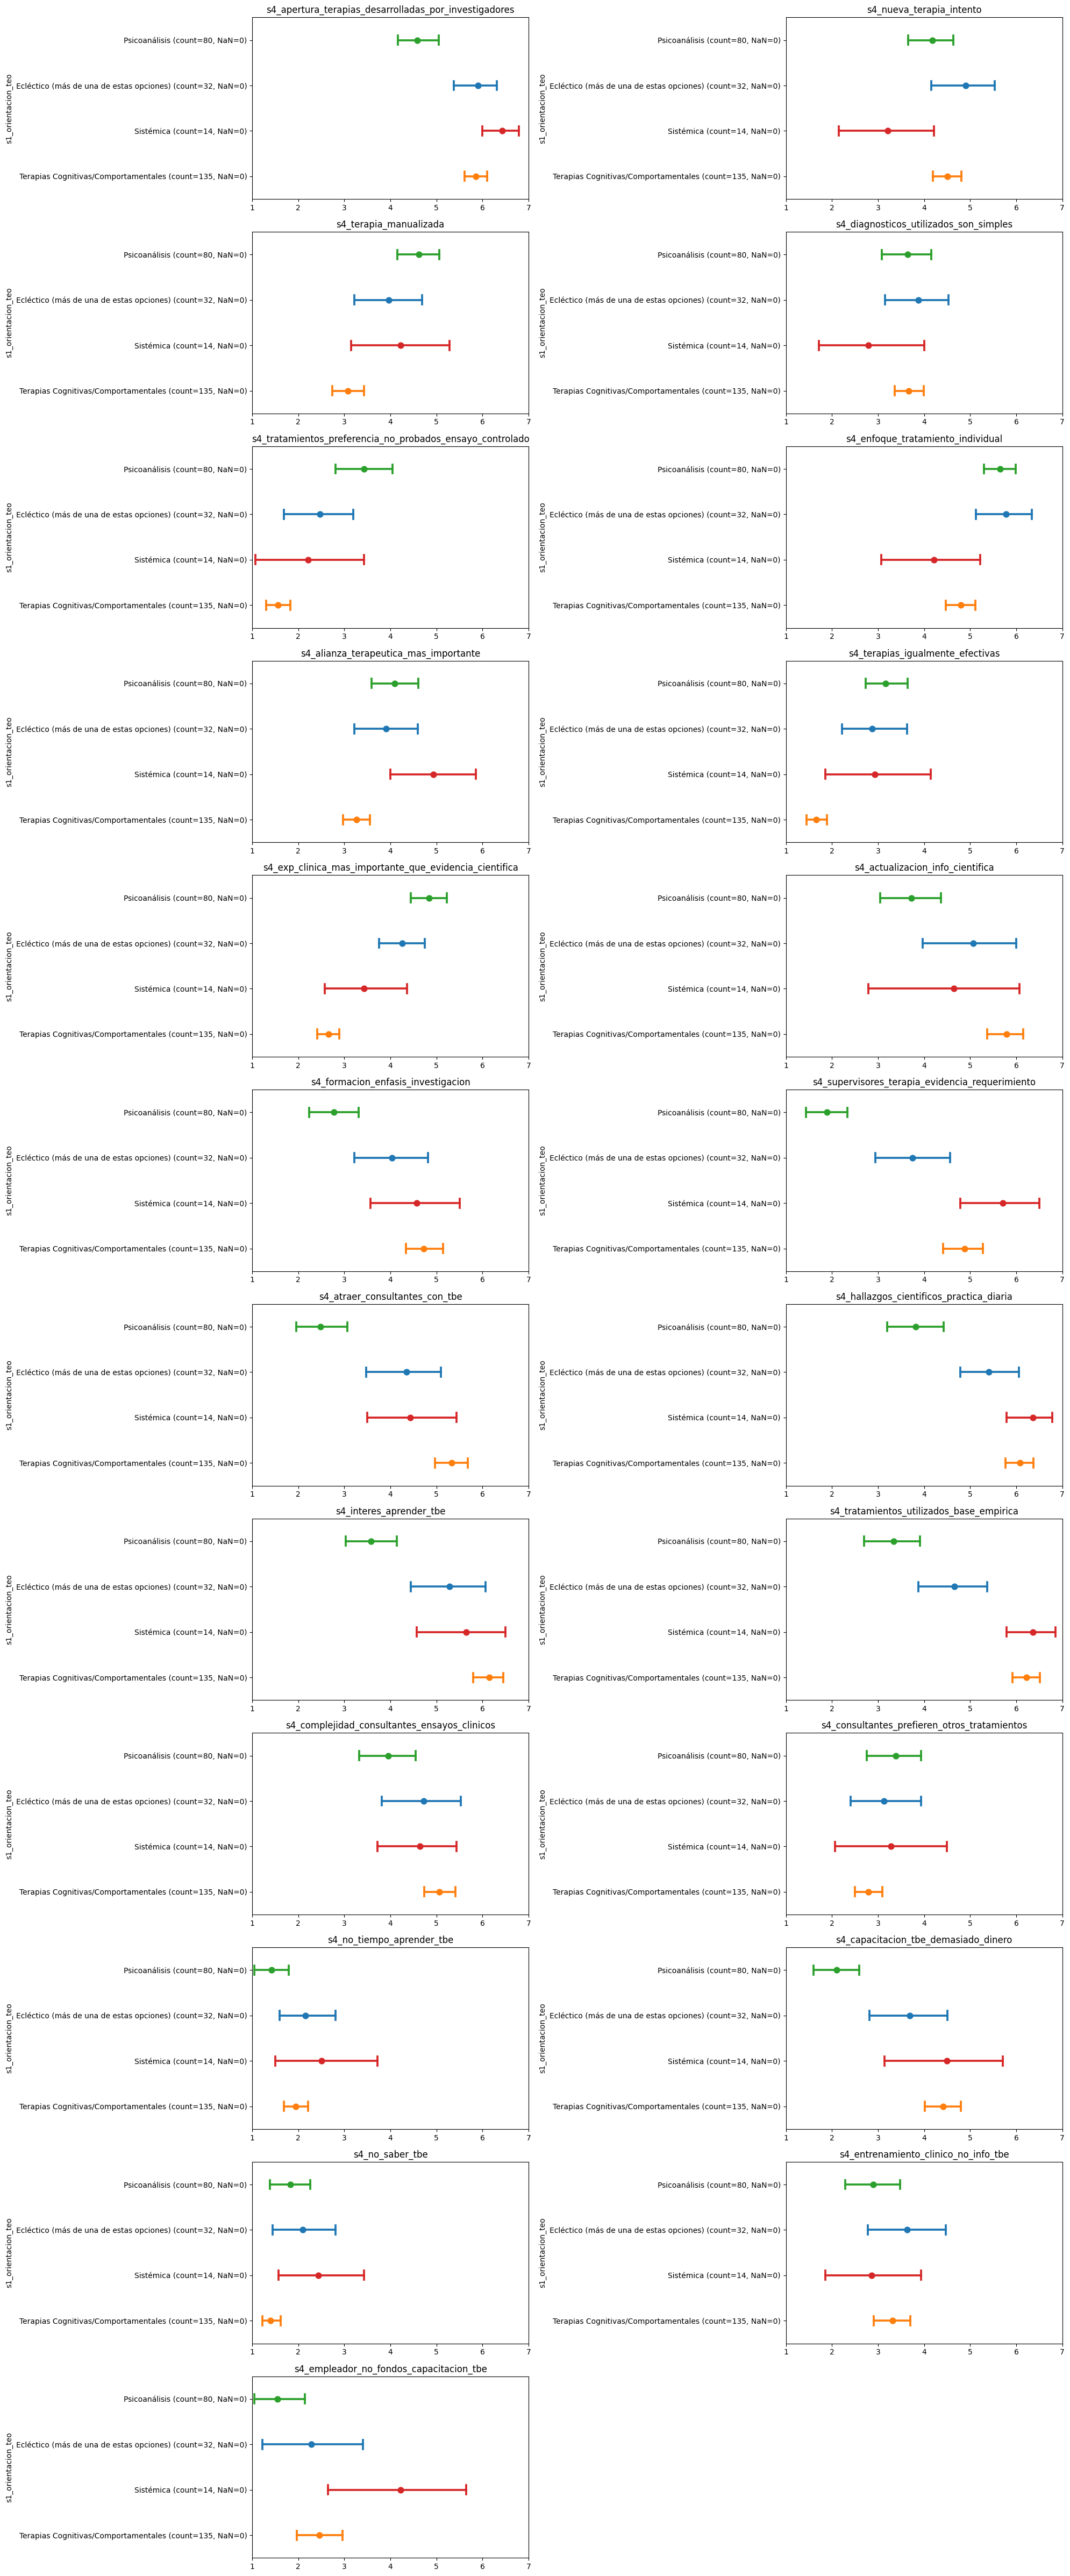

In [22]:
df_subset_s4 = create_section_4(df)

# List of variables for which you want to create point plots
variables_s4 = ['s4_apertura_terapias_desarrolladas_por_investigadores', 's4_nueva_terapia_intento',
             's4_terapia_manualizada', 's4_diagnosticos_utilizados_son_simples', 
             's4_tratamientos_preferencia_no_probados_ensayo_controlado', 's4_enfoque_tratamiento_individual', 
             's4_alianza_terapeutica_mas_importante', 's4_terapias_igualmente_efectivas', 
             's4_exp_clinica_mas_importante_que_evidencia_cientifica', 's4_actualizacion_info_cientifica', 
             's4_formacion_enfasis_investigacion', 's4_supervisores_terapia_evidencia_requerimiento', 
             's4_atraer_consultantes_con_tbe', 's4_hallazgos_cientificos_practica_diaria', 
             's4_interes_aprender_tbe', 's4_tratamientos_utilizados_base_empirica', 
             's4_complejidad_consultantes_ensayos_clinicos', 's4_consultantes_prefieren_otros_tratamientos', 
             's4_no_tiempo_aprender_tbe', 's4_capacitacion_tbe_demasiado_dinero', 
             's4_no_saber_tbe', 's4_entrenamiento_clinico_no_info_tbe', 
             's4_empleador_no_fondos_capacitacion_tbe'] 

plot_section(df_subset_s4,variables_s4)

#### 4.2.1 MANOVA for Section IV

In [23]:
# Drop NaNs from the data
df_subset_clean = df_subset_s4.dropna()

# List of variables for which you want to perform one-way MANOVA
dependent_vars = variables_s4

# Define dependent and independent variables
X = df_subset_clean['s1_orientacion_teo']
Y = df_subset_clean[dependent_vars]

# Perform one-way MANOVA
maov = MANOVA.from_formula('s1_orientacion_teo ~ ' + ' + '.join(dependent_vars), data=df_subset_clean)

print(maov.mv_test())

                                   Multivariate linear model
                                                                                                
-------------------------------------------------------------------------------------------------
         Intercept                Value          Num DF   Den DF          F Value          Pr > F
-------------------------------------------------------------------------------------------------
            Wilks' lambda               -0.0000  4.0000  234.0000  -1203016338818204.5000  1.0000
           Pillai's trace                1.0000  4.0000  234.0000  -1203016338818204.7500  1.0000
   Hotelling-Lawley trace  -20564381860140.2500  4.0000  234.0000  -1203016338818204.7500  1.0000
      Roy's greatest root  -20564381860140.2500  4.0000  234.0000  -1203016338818204.5000  1.0000
------------------------------------------------------------------------------------------------
                                                           

#### 4.2.2 MANCOVA for Section IV

In [24]:
# Drop NaNs from the data
df_subset_clean = df_subset_s4.dropna()

# List of dependent variables for MANCOVA
dependent_vars = variables_s4

# Define the formula, including the independent variable and covariates
formula = 's1_orientacion_teo ~ ' + ' + '.join(dependent_vars) + ' + s1_edad + s1_genero + s1_horas_semana_pacientes_atendidos'

# Perform MANCOVA
mancova = MANOVA.from_formula(formula, data=df_subset_clean)

# Print the MANCOVA results
print(mancova.mv_test())


                                   Multivariate linear model
                                                                                                
-------------------------------------------------------------------------------------------------
           Intercept                Value         Num DF   Den DF          F Value         Pr > F
-------------------------------------------------------------------------------------------------
              Wilks' lambda              -0.0000  4.0000  229.0000  -282709516082251.1875  1.0000
             Pillai's trace               1.0000  4.0000  229.0000  -282709516082251.2500  1.0000
     Hotelling-Lawley trace  -4938157486152.8594  4.0000  229.0000  -282709516082251.2500  1.0000
        Roy's greatest root  -4938157486152.8594  4.0000  229.0000  -282709516082251.1875  1.0000
------------------------------------------------------------------------------------------------
                                                           

- **Covariate Impact:** The addition of covariates has led to a decrease in the significance of some variables that were previously significant in the MANOVA. For example, `s4_apertura_terapias_desarrolladas_por_investigadores` no longer hold significant values (p=0.06)
- **New Influences:** The significance of `s1_edad` highlights age as an influential factor in the responses, which may alter how these dependent variables interact.

#### 4.3 Tukey's HSD for Section IV

In [25]:
# Loop over each variable in the list and perform Tukey's HSD
for var in variables_s4:
    mc = multi.MultiComparison(df_subset_clean[var], df_subset_clean['s1_orientacion_teo'])
    res = mc.tukeyhsd()
    print(f'{var}')
    print(res.summary())
    print()

s4_apertura_terapias_desarrolladas_por_investigadores
                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                 
                 group1                                 group2                meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------------
Ecléctico (más de una de estas opciones)                        Psicoanálisis  -1.3187 0.0007 -2.1959 -0.4416   True
Ecléctico (más de una de estas opciones)                            Sistémica   0.5223 0.7465 -0.8214  1.8661  False
Ecléctico (más de una de estas opciones) Terapias Cognitivas/Comportamentales   -0.047 0.9989 -0.8715  0.7775  False
                           Psicoanálisis                            Sistémica   1.8411 0.0007  0.6262  3.0559   True
                           Psicoanálisis Terapias Cognitivas/Comportamentales   1.2718    0.0  0.6801  1.8634   True
          

### 4.4 Significant Results for Section 4 Summary:

##### s4_apertura_terapias_desarrolladas_por_investigadores:

- Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.3187 (p = 0.0007).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of 1.8411 (p = 0.0007).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 1.2718 (p = 0.0000).

Interpretation: Psychoanalytic practitioners are less open to therapies developed by researchers compared to eclectic and systemic orientations.

##### s4_nueva_terapia_intento:

- Ecléctico vs Sistémica: Significant difference with a mean difference of -1.6920 (p = 0.0495).

Interpretation: Eclectic practitioners are less likely to attempt new therapies compared to systemic practitioners.

##### s4_terapia_manualizada:

- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -1.5310 (p = 0.0000).

Interpretation: Psychoanalytic practitioners rely less on manualized therapies compared to cognitive-behavioral therapy practitioners.

##### s4_enfoque_tratamiento_individual:

- Ecléctico vs Sistémica: Significant difference with a mean difference of -1.5670 (p = 0.0476).
- Ecléctico vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -0.9813 (p = 0.0413).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of -1.4357 (p = 0.0434).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -0.8500 (p = 0.0081).

Interpretation: Psychoanalytic practitioners focus more on individualized treatments compared to both eclectic and cognitive-behavioral practitioners.

##### s4_alianza_terapeutica_mas_importante:

- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -0.8282 (p = 0.0180).
- Sistémica vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -1.6693 (p = 0.0161).

Interpretation: Cognitive-behavioral therapy practitioners value the therapeutic alliance differently compared to psychoanalysts and systemic practitioners.

##### s4_terapias_igualmente_efectivas:

- Ecléctico vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -1.2157 (p = 0.0026).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -1.5032 (p = 0.0000).
- Sistémica vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -1.2693 (p = 0.0492).

Interpretation: Cognitive-behavioral therapy practitioners see their therapy as more effective than those with eclectic, psychoanalytic, or systemic orientations.

##### s4_exp_clinica_mas_importante_que_evidencia_cientifica:

- Ecléctico vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -1.5907 (p = 0.0000).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of -1.4089 (p = 0.0166).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of -2.1782 (p = 0.0000).

Interpretation: Cognitive-behavioral therapy practitioners prioritize clinical evidence more than psychoanalytic or eclectic practitioners.

##### s4_supervisores_terapia_evidencia_requerimiento:

- Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.8625 (p = 0.0015).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of 3.8268 (p = 0.0000).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.9866 (p = 0.0000).

Interpretation: Psychoanalytic practitioners report less reliance on supervisors requiring evidence-based therapy compared to eclectic, systemic, and cognitive-behavioral therapy practitioners.

##### s4_atraer_consultantes_con_tbe:

- Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.8688 (p = 0.0007).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of 1.9536 (p = 0.0189).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.8583 (p = 0.0000).

Interpretation: Cognitive-behavioral therapy practitioners are more likely to attract clients through evidence-based therapy compared to psychoanalytic and eclectic practitioners.

##### s4_hallazgos_cientificos_practica_diaria:

- Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.5938 (p = 0.0029).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of 2.5446 (p = 0.0004).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.2690 (p = 0.0000).

Interpretation: Psychoanalytic practitioners rely less on scientific findings in their daily practice compared to both systemic and cognitive-behavioral therapy practitioners.

##### s4_interes_aprender_tbe:

- Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.7062 (p = 0.0019).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of 2.0679 (p = 0.0088).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.5657 (p = 0.0000).

Interpretation: Psychoanalytic practitioners are less interested in learning evidence-based therapies compared to cognitive-behavioral and systemic practitioners.

##### s4_tratamientos_utilizados_base_empirica:

- Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.3188 (p = 0.0230).
- Ecléctico vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 1.5660 (p = 0.0020).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of 3.0196 (p = 0.0000).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.8847 (p = 0.0000).

Interpretation: Cognitive-behavioral therapy practitioners rely significantly more on empirically based treatments compared to eclectic and psychoanalytic practitioners.

##### s4_complejidad_consultantes_ensayos_clinicos:

- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 1.1093 (p = 0.0049).

Interpretation: Cognitive-behavioral therapy practitioners deal with more complex clients in clinical trials compared to psychoanalytic practitioners.

##### s4_capacitacion_tbe_demasiado_dinero:

- Ecléctico vs Psicoanálisis: Significant difference with a mean difference of -1.5875 (p = 0.0071).
- Psicoanálisis vs Sistémica: Significant difference with a mean difference of 2.4000 (p = 0.0026).
- Psicoanálisis vs Terapias Cognitivas/Comportamentales: Significant difference with a mean difference of 2.3074 (p = 0.0000).

Interpretation: Psychoanalytic practitioners perceive training in evidence-based therapy as more expensive compared to both eclectic and systemic orientations.

### Main Messages
1. Evidence-Based Orientation and Empirical Approach

- Cognitive-Behavioral Therapy (CBT) Practitioners Lead in Evidence-Based Practices: Across multiple metrics, CBT practitioners consistently demonstrate a stronger reliance on evidence-based approaches than eclectic and psychoanalytic orientations. This is seen in the significantly higher use of empirical measures (e.g., controlled trials, outcome measures) and adherence to clinical guidelines and manuals. This distinction underscores a preference within CBT for empirically grounded treatment strategies.
- Psychoanalytic Orientation Lags in Empirical Support: Psychoanalytic practitioners show a notably lower reliance on empirical approaches and evidence-based practices. This includes a reduced emphasis on supervision, scientific findings, and formal outcome measures. This may reflect fundamental theoretical differences within psychoanalysis that prioritize personal insight over empirical rigor.


2. Openness to New and Research-Based Therapies

- Higher Openness Among CBT and Systemic Practitioners: CBT and systemic practitioners report greater openness to therapies developed by researchers and display more willingness to experiment with new therapeutic approaches. Conversely, psychoanalytic practitioners exhibit less openness to research-developed therapies, suggesting potential barriers within psychoanalysis to integrating new empirical findings.
- Manualized Therapies and Structured Interventions: CBT practitioners rely more on manualized therapies than psychoanalytic and eclectic orientations, reflecting a structured, protocol-based approach that aligns with empirical research. In contrast, psychoanalytic practitioners prefer individualized treatments, which may align with the personal, client-centered emphasis typical of psychoanalysis.

3. Differences in Perceptions of Therapeutic Alliance and Therapy Efficacy

- Therapeutic Alliance Valued Differently by CBT Practitioners: CBT practitioners hold a distinct perspective on the therapeutic alliance, perceiving it differently in importance compared to psychoanalytic and systemic approaches. This may suggest that while the alliance is recognized as critical across orientations, CBT may balance it with structured therapeutic techniques.
- Perceptions of Therapy Efficacy: CBT practitioners report a higher perceived efficacy of their approach compared to eclectic, psychoanalytic, and systemic therapies. This perspective may reflect the alignment of CBT with outcome-based, measurable treatment goals that resonate with evidence-based metrics.

4. Emphasis on Practical Experience vs. Scientific Evidence

- CBT Prioritizes Evidence Over Personal Clinical Experience: While CBT practitioners prioritize scientific evidence, eclectic and psychoanalytic orientations place more emphasis on personal clinical experience. This distinction highlights a potential rift between the reliance on formalized scientific standards (CBT) and experiential knowledge (psychoanalytic and eclectic).
- Supervision and Evidence-Based Requirements: Supervisors in CBT and systemic settings are more likely to emphasize evidence-based requirements for therapy compared to those in psychoanalytic settings, where supervision may focus more on personal insight and less on empirical accountability.

## Visualizations English

In [26]:
translation_dict = {
    "s1_edad": "Age",
    "s1_genero": "Gender",
    "s1_experiencia_clinica": "Clinical Experience",
    "s1_educacion": "Education",
    "s1_titulo_terciario": "Tertiary Degree",
    "s1_titulo": "Degree",
    "s1_no_titulo_universitario": "No University Degree",
    "s1_horas_semana_pacientes_atendidos": "Hours per Week - Patients Attended",
    "s1_contexto_trabajo": "Work Context",
    "s1_orientacion_teo": "Theoretical Orientation",
    "s1_marco_teo_terapia_basada_arte": "Theoretical Framework - Art Therapy",
    "s1_marco_teo_psa": "Theoretical Framework - Psychoanalysis",
    "s1_marco_teo_tcc": "Theoretical Framework - CBT",
    "s1_marco_teo_humanista": "Theoretical Framework - Humanistic",
    "s1_marco_teo_eclectico": "Theoretical Framework - Eclectic",
    "s2_evidencia_cientifica": "Scientific Evidence",
    "s2_experiencia_personal": "Personal Experience",
    "s2_entrenamiento_clinica": "Clinical Training",
    "s2_tratamiento_preferencia_consultantes": "Patient Treatment Preferences",
    "s2_intuicion": "Intuition",
    "s2_terapia_personal": "Personal Therapy",
    "s3_tratamiento_personal_consultantes": "Personal Treatment Experience",
    "s3_investigacion_empirica_ensayos_controlados": "Empirical Research - RCTs",
    "s3_supervision": "Supervision",
    "s3_estudios_de_caso": "Case Studies",
    "s3_discusion_pares": "Peer Discussions",
    "s3_libros": "Books",
    "s3_observaciones_casos_clinicos": "Clinical Case Observations",
    "s3_medidas_resultado": "Outcome Measures",
    "s3_guias_manuales_clinicos": "Clinical Manuals",
    "s4_apertura_terapias_desarrolladas_por_investigadores": "Openness to Research-based Therapies",
    "s4_actualizacion_info_cientifica": "Scientific Information Updates",
    "s4_formacion_enfasis_investigacion": "Research-Emphasized Training",
    "s4_supervisores_terapia_evidencia_requerimiento": "Supervisors Require Evidence-based Therapy",
    "s4_tratamientos_cientificos_eficientes": "Efficient Scientific Treatments",
    "s4_atraer_consultantes_con_tbe": "Attract Patients with EBTs",
    "s4_hallazgos_cientificos_practica_diaria": "Scientific Findings in Daily Practice",
    "s4_nueva_terapia_intento": "Trying New Therapies",
    "s4_interes_aprender_tbe": "Interest in Learning EBTs",
    "s4_tratamientos_utilizados_base_empirica": "Empirical Basis for Used Treatments",
    "s4_complejidad_consultantes_ensayos_clinicos": "Complexity of Patients in RCTs",
    "s4_consultantes_prefieren_otros_tratamientos": "Patients Prefer Other Treatments",
    "s4_terapia_manualizada": "Manualized Therapy",
    "s4_diagnosticos_utilizados_son_simples": "Diagnosis Simplicity",
    "s4_tratamientos_preferencia_no_probados_ensayo_controlado": "Preference for Non-RCT Treatments",
    "s4_enfoque_tratamiento_individual": "Individualized Treatment Approach",
    "s4_no_tiempo_aprender_tbe": "No Time to Learn EBTs",
    "s4_capacitacion_tbe_demasiado_dinero": "EBT Training is Too Expensive",
    "s4_no_saber_tbe": "Lack of Knowledge on EBTs",
    "s4_entrenamiento_clinico_no_info_tbe": "Clinical Training Lacks EBT Info",
    "s4_alianza_terapeutica_mas_importante": "Therapeutic Alliance is More Important",
    "s4_terapias_igualmente_efectivas": "All Therapies are Equally Effective",
    "s4_empleador_no_fondos_capacitacion_tbe": "Employer Lacks Funds for EBT Training",
    "s4_exp_clinica_mas_importante_que_evidencia_cientifica": "Clinical Experience > Scientific Evidence",
    "provincia_residencia": "Residence Province",
    "consentimiento_informado": "Informed Consent"
}

def plot_section_translated(df_subset, variables, y_variable='s1_orientacion_teo', num_cols=2, original_y_order=None):
    """
    Creates point plots for the given independent variables, optimized for scientific articles.

    Parameters:
    - df_subset: DataFrame containing the data.
    - variables: List of column names to create point plots for.
    - y_variable: The dependent variable (default: 's1_orientacion_teo').
    - num_cols: Number of columns in the subplot grid (default: 2).
    - original_y_order: List of y-axis labels in the desired order (default: theoretical orientations).
    """

    # Define translations for theoretical orientations
    theoretical_translation = {
        'Terapias Cognitivas/Comportamentales': 'Cognitive-Behavioral Therapies',
        'Psicoanálisis': 'Psychoanalysis',
        'Ecléctico (más de una de estas opciones)': 'Eclectic (more than one option)',
        'Sistémica': 'Systemic'
    }

    # Rename y_variable column values for translation
    df_subset = df_subset.replace({y_variable: theoretical_translation})

    # Translate y-axis order if provided
    if original_y_order is None:
        original_y_order = ['Psychoanalysis', 'Eclectic (more than one option)', 
                            'Systemic', 'Cognitive-Behavioral Therapies']

    # Translate variable names only for the plots
    translated_variables = [translation_dict.get(var, var) for var in variables]

    # Create subplot grid
    num_rows = math.ceil(len(variables) / num_cols)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3.5 * num_rows))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)

    axs = axs.flatten()

    for i, (var, translated_var) in enumerate(zip(variables, translated_variables)):
        counts = df_subset.groupby(y_variable)[var].count()
        nan_counts = df_subset[df_subset[var].isna()].groupby(y_variable).size()

        # Improved color scheme and markers
        sns.pointplot(
            x=var, y=y_variable, hue=y_variable, data=df_subset, orient="h",
            linestyle='none', capsize=0.2, ax=axs[i], order=original_y_order,
            markers=["o", "s", "D", "^"], palette="deep", dodge=True
        )

        if axs[i].get_legend() is not None:
            axs[i].get_legend().remove()

        # Set clear title and labels
        axs[i].set_title(translated_var, fontsize=14, fontweight='bold', fontname='Times New Roman')
        axs[i].set_xlabel('Rating (1-7)', fontsize=12, fontweight='bold', fontname='Times New Roman')
        axs[i].set_xlim(1, 7)

        # Get current tick locations
        yticks = axs[i].get_yticks()
        yticklabels = [label.get_text() for label in axs[i].get_yticklabels()]

        # Set proper tick locations and labels to avoid warning
        axs[i].set_yticks(yticks)
        axs[i].set_yticklabels(yticklabels, fontsize=12, fontname='Times New Roman')

        # Set y-axis label only on the leftmost plots
        if i % num_cols == 0:
            axs[i].set_ylabel("Theoretical Orientation", fontsize=12, fontweight='bold', fontname='Times New Roman')
        else:
            axs[i].set_ylabel("")

    # Remove unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


### MANCOVA English Section II

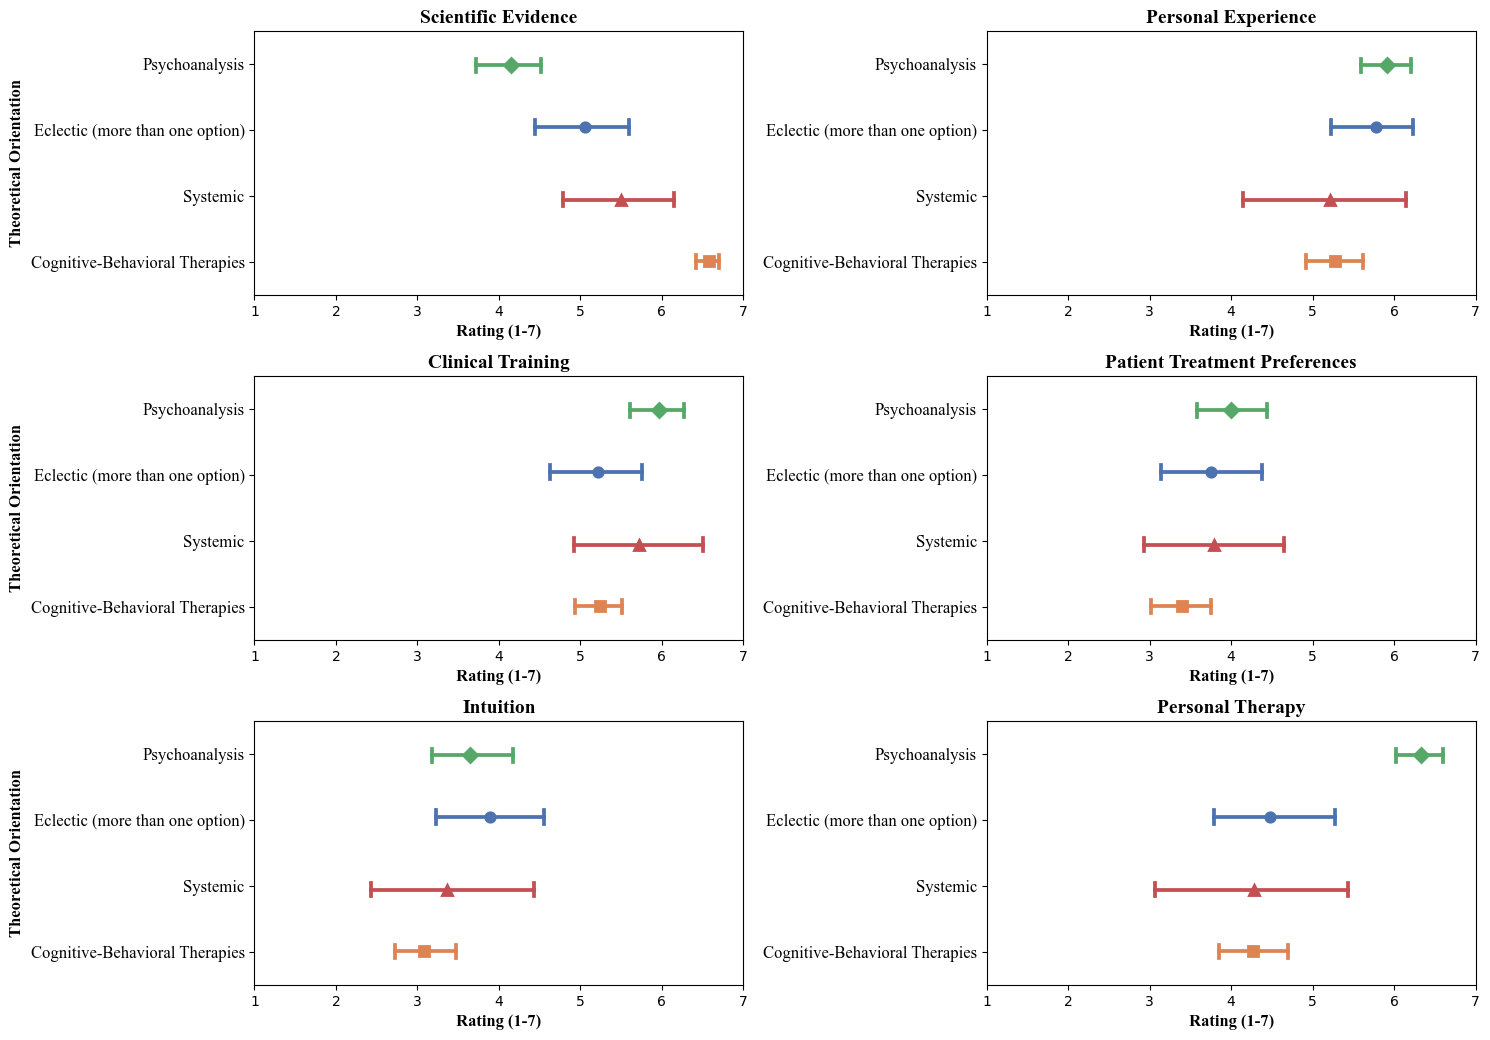

In [27]:
plot_section_translated(df_subset_s2, variables_s2)

### MANCOVA English Section III

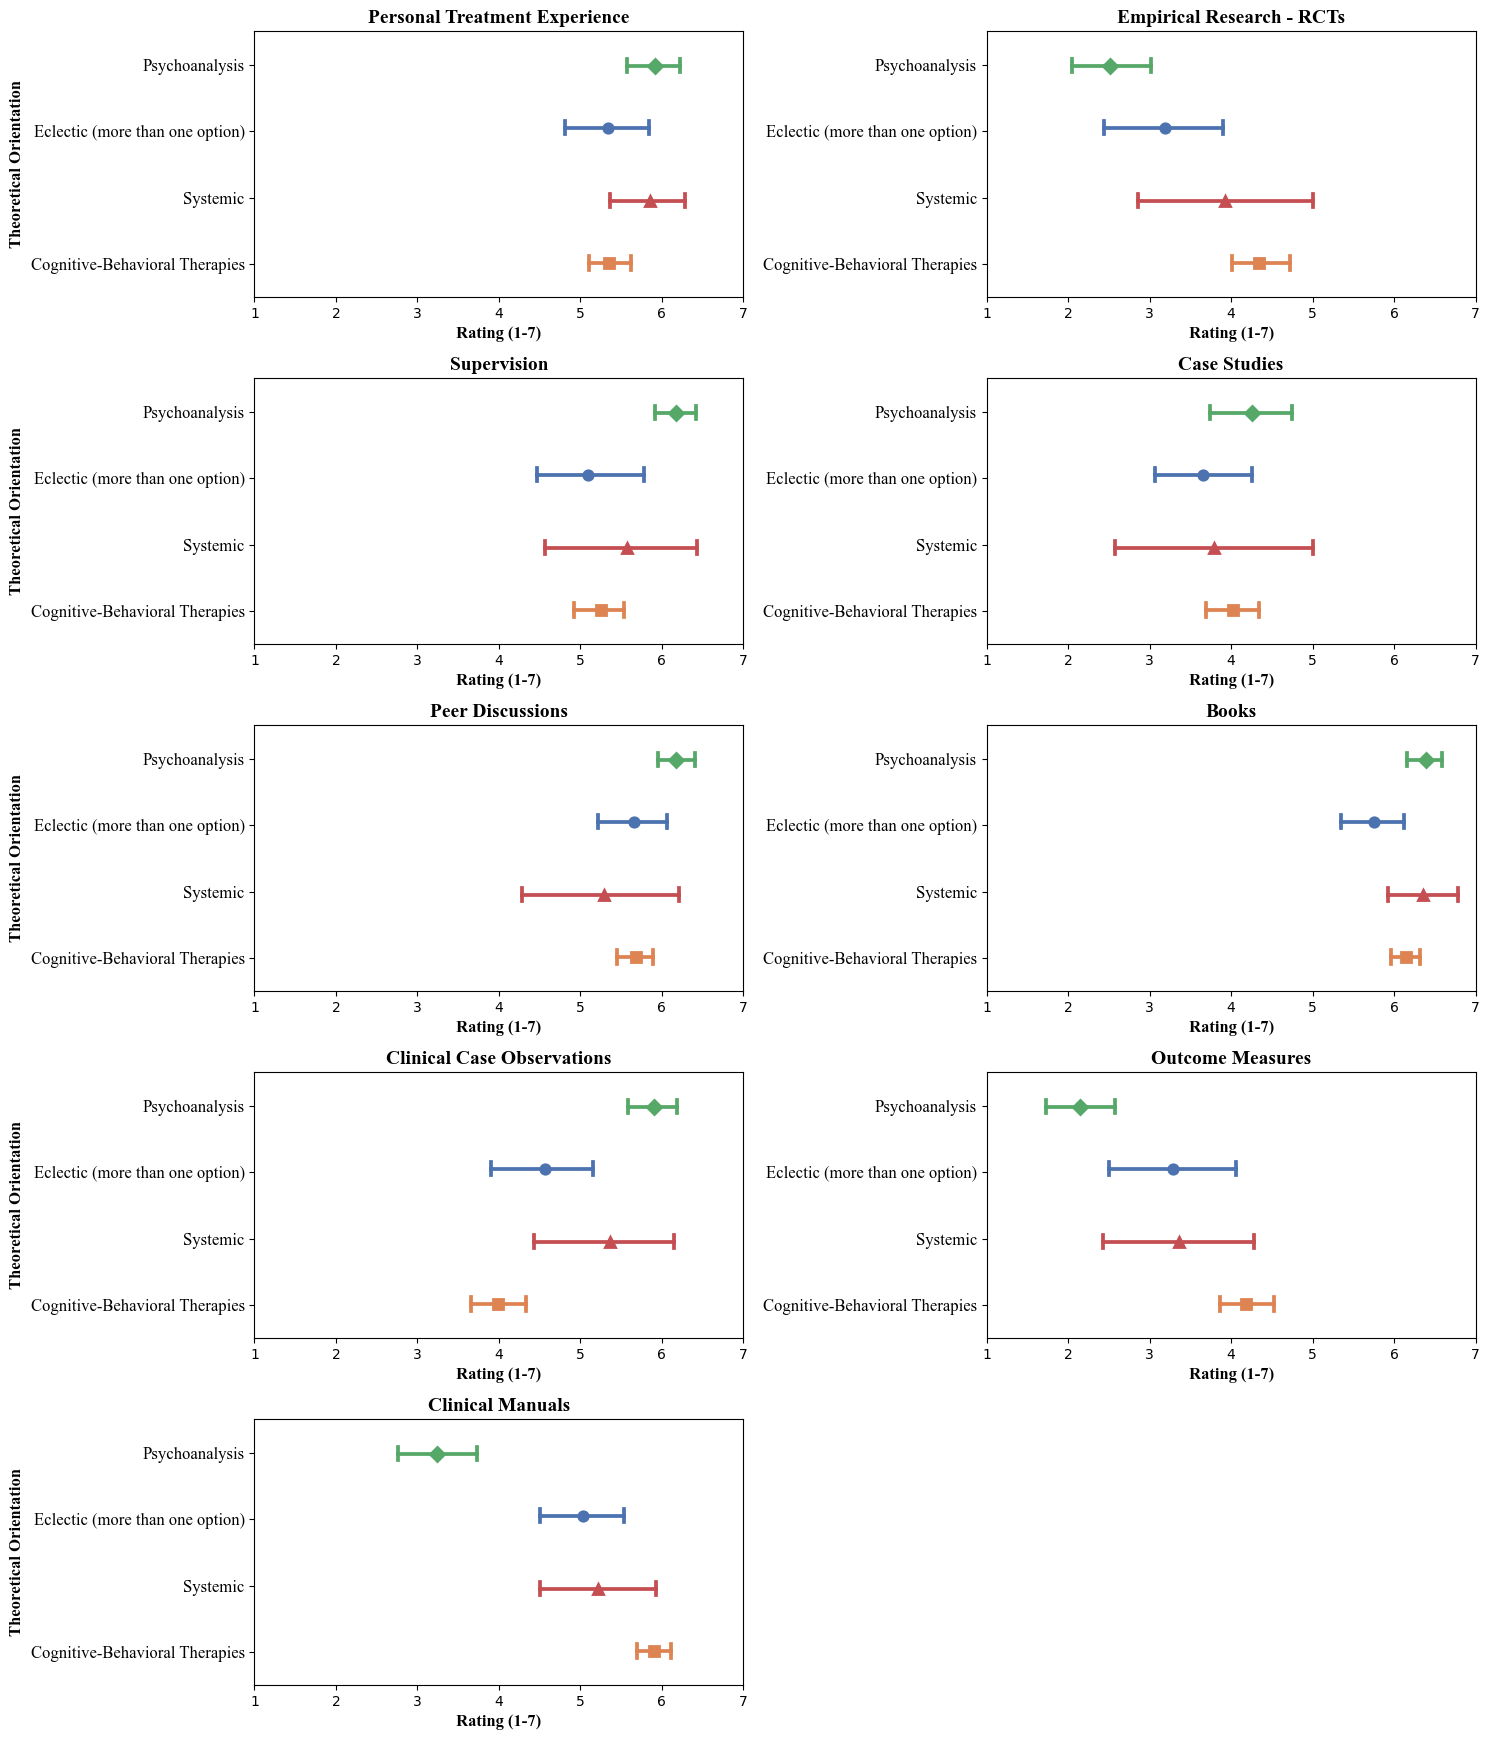

In [28]:
plot_section_translated(df_subset_s3, variables_s3)

### MANCOVA English Section IV

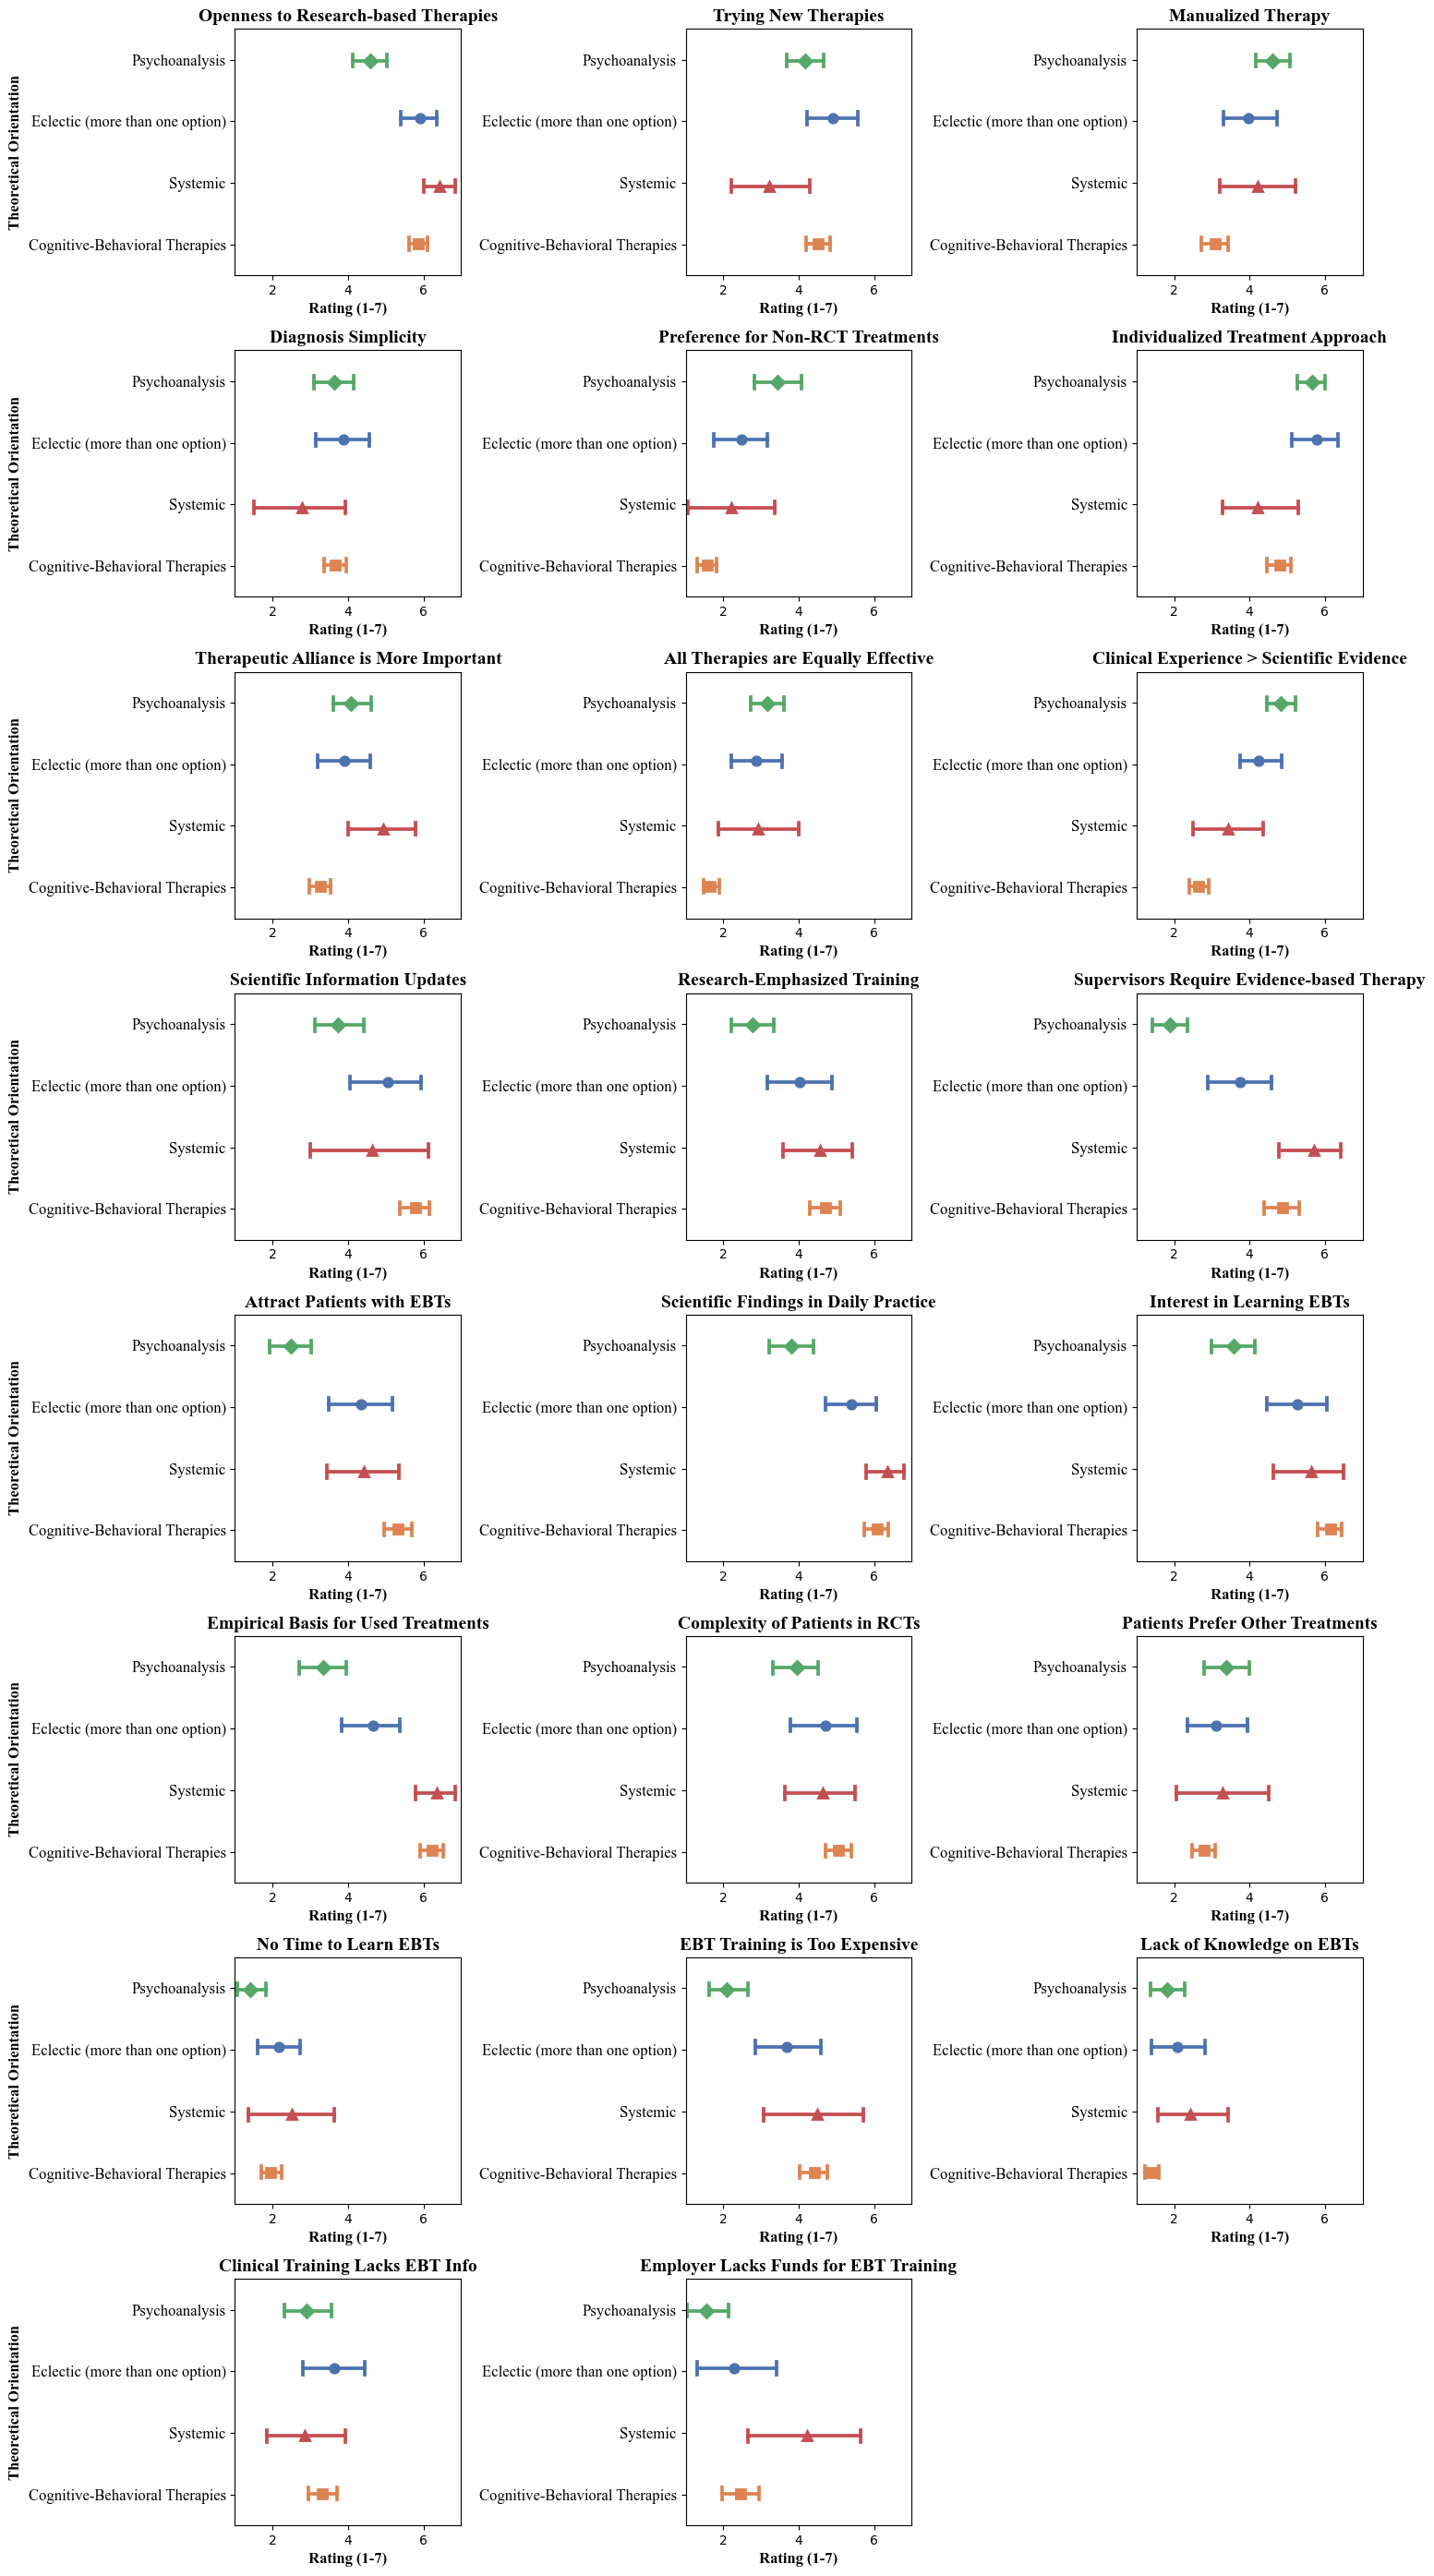

In [29]:
plot_section_translated(df_subset_s4, variables_s4, num_cols=3)

## Descriptive Plots

In [30]:
df_subset_s3.columns

Index(['s1_edad', 's1_genero', 's1_horas_semana_pacientes_atendidos',
       's1_orientacion_teo', 's3_tratamiento_personal_consultantes',
       's3_investigacion_empirica_ensayos_controlados', 's3_supervision',
       's3_estudios_de_caso', 's3_discusion_pares', 's3_libros',
       's3_observaciones_casos_clinicos', 's3_medidas_resultado',
       's3_guias_manuales_clinicos'],
      dtype='object')

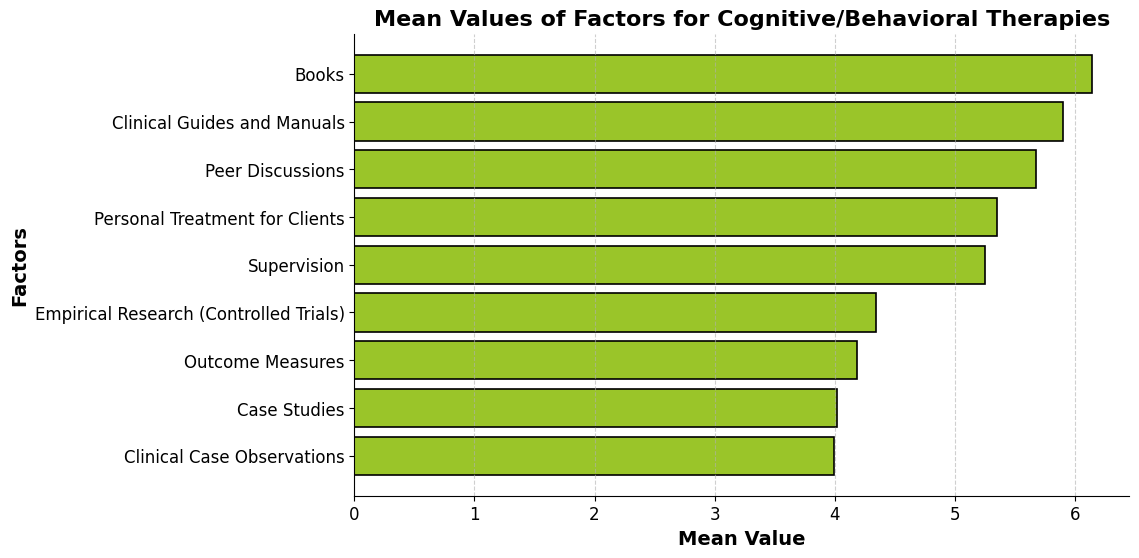

In [44]:
# Define relevant columns for mean calculation
columns_to_analyze = [
    's3_tratamiento_personal_consultantes',
    's3_investigacion_empirica_ensayos_controlados',
    's3_supervision',
    's3_estudios_de_caso',
    's3_discusion_pares',
    's3_libros',
    's3_observaciones_casos_clinicos',
    's3_medidas_resultado',
    's3_guias_manuales_clinicos'
]

# Filter dataset for "Cognitive/Behavioral Therapies" orientation
df_cbt = df_subset_s3[df_subset_s3['s1_orientacion_teo'] == 'Terapias Cognitivas/Comportamentales']

# Calculate mean values for selected columns
df_cbt_means = df_cbt[columns_to_analyze].mean().reset_index()
df_cbt_means.columns = ['Factor', 'Mean Value']

# Sort values in descending order
df_cbt_means_sorted = df_cbt_means.sort_values(by='Mean Value', ascending=False)

# Define English translations for the factors
translations = {
    's3_tratamiento_personal_consultantes': 'Personal Treatment for Clients',
    's3_investigacion_empirica_ensayos_controlados': 'Empirical Research (Controlled Trials)',
    's3_supervision': 'Supervision',
    's3_estudios_de_caso': 'Case Studies',
    's3_discusion_pares': 'Peer Discussions',
    's3_libros': 'Books',
    's3_observaciones_casos_clinicos': 'Clinical Case Observations',
    's3_medidas_resultado': 'Outcome Measures',
    's3_guias_manuales_clinicos': 'Clinical Guides and Manuals'
}

# Apply translations
df_cbt_means_sorted['Factor'] = df_cbt_means_sorted['Factor'].map(translations)

# Define custom color
green = "#9AC529"

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.barh(df_cbt_means_sorted['Factor'], df_cbt_means_sorted['Mean Value'], color=green, edgecolor='black', linewidth=1.2)

# Labels and title with a more scientific format
ax.set_xlabel('Mean Value', fontsize=14, fontweight='bold')
ax.set_ylabel('Factors', fontsize=14, fontweight='bold')
ax.set_title('Mean Values of Factors for Cognitive/Behavioral Therapies', fontsize=16, fontweight='bold')

# Invert y-axis for better readability
ax.invert_yaxis()

# Add grid with a professional look
ax.xaxis.grid(True, linestyle='--', alpha=0.6, linewidth=0.8)
ax.yaxis.grid(False)  # Avoid clutter on y-axis

# Remove unnecessary spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick labels for clarity
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the final refined plot
plt.show()


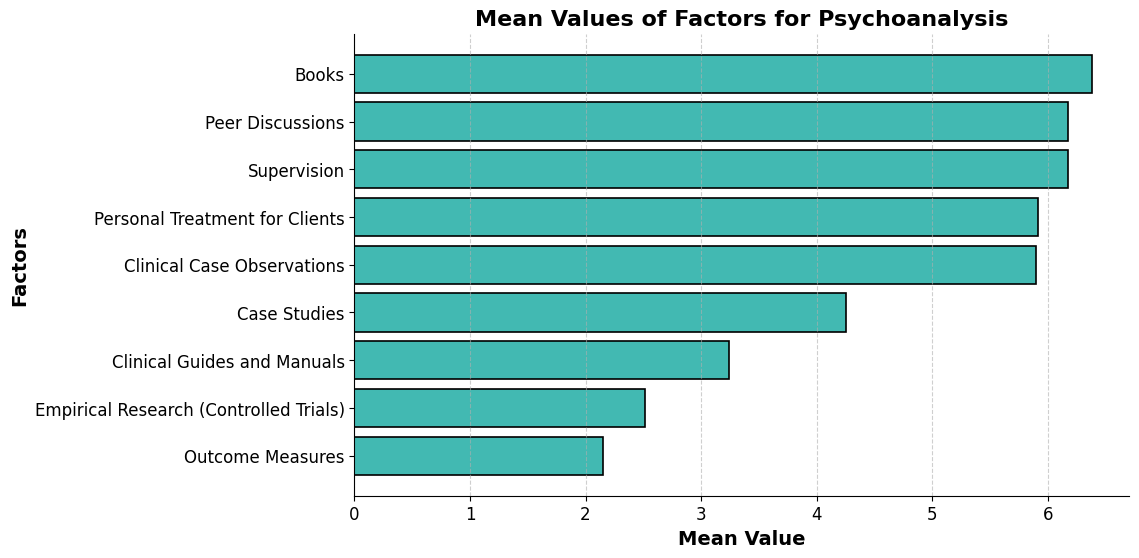

In [46]:
# Define relevant columns for mean calculation
columns_to_analyze = [
    's3_tratamiento_personal_consultantes',
    's3_investigacion_empirica_ensayos_controlados',
    's3_supervision',
    's3_estudios_de_caso',
    's3_discusion_pares',
    's3_libros',
    's3_observaciones_casos_clinicos',
    's3_medidas_resultado',
    's3_guias_manuales_clinicos'
]

# Filter dataset for "Cognitive/Behavioral Therapies" orientation
df_cbt = df_subset_s3[df_subset_s3['s1_orientacion_teo'] == 'Psicoanálisis']

# Calculate mean values for selected columns
df_cbt_means = df_cbt[columns_to_analyze].mean().reset_index()
df_cbt_means.columns = ['Factor', 'Mean Value']

# Sort values in descending order
df_cbt_means_sorted = df_cbt_means.sort_values(by='Mean Value', ascending=False)

# Define English translations for the factors
translations = {
    's3_tratamiento_personal_consultantes': 'Personal Treatment for Clients',
    's3_investigacion_empirica_ensayos_controlados': 'Empirical Research (Controlled Trials)',
    's3_supervision': 'Supervision',
    's3_estudios_de_caso': 'Case Studies',
    's3_discusion_pares': 'Peer Discussions',
    's3_libros': 'Books',
    's3_observaciones_casos_clinicos': 'Clinical Case Observations',
    's3_medidas_resultado': 'Outcome Measures',
    's3_guias_manuales_clinicos': 'Clinical Guides and Manuals'
}

# Apply translations
df_cbt_means_sorted['Factor'] = df_cbt_means_sorted['Factor'].map(translations)

# Define custom color
blue = "#42B9B2"

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.barh(df_cbt_means_sorted['Factor'], df_cbt_means_sorted['Mean Value'], color=blue, edgecolor='black', linewidth=1.2)

# Labels and title with a more scientific format
ax.set_xlabel('Mean Value', fontsize=14, fontweight='bold')
ax.set_ylabel('Factors', fontsize=14, fontweight='bold')
ax.set_title('Mean Values of Factors for Psychoanalysis', fontsize=16, fontweight='bold')

# Invert y-axis for better readability
ax.invert_yaxis()

# Add grid with a professional look
ax.xaxis.grid(True, linestyle='--', alpha=0.6, linewidth=0.8)
ax.yaxis.grid(False)  # Avoid clutter on y-axis

# Remove unnecessary spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick labels for clarity
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the final refined plot
plt.show()


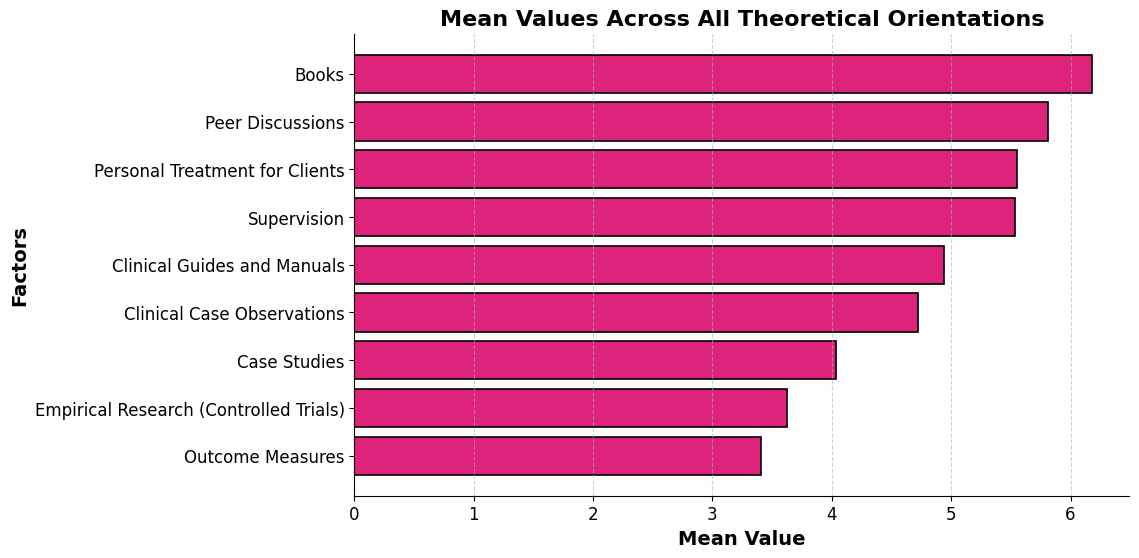

In [50]:
# Sort values in descending order
df_overall_means_sorted = df_overall_means.sort_values(by='Mean Value', ascending=False)

# Define custom color
pink = "#DE237B"

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with sorted values
ax.barh(df_overall_means_sorted['Factor'], df_overall_means_sorted['Mean Value'], color=pink, edgecolor='black', linewidth=1.2)

# Labels and title with a scientific format
ax.set_xlabel('Mean Value', fontsize=14, fontweight='bold')
ax.set_ylabel('Factors', fontsize=14, fontweight='bold')
ax.set_title('Mean Values Across All Theoretical Orientations', fontsize=16, fontweight='bold')

# Invert y-axis for better readability
ax.invert_yaxis()

# Add grid with a professional look
ax.xaxis.grid(True, linestyle='--', alpha=0.6, linewidth=0.8)
ax.yaxis.grid(False)  # Avoid clutter on y-axis

# Remove unnecessary spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick labels for clarity
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the final refined plot
plt.show()
